---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
!cat Employee_Movie_Choices.txt

#Employee	Movie
Andy	Anaconda
Andy	Mean Girls
Andy	The Matrix
Claude	Anaconda
Claude	Monty Python and the Holy Grail
Claude	Snakes on a Plane
Frida	The Matrix
Frida	The Shawshank Redemption
Frida	The Social Network
Georgia	Anaconda
Georgia	Monty Python and the Holy Grail
Georgia	Snakes on a Plane
Joan	Forrest Gump
Joan	Kung Fu Panda
Joan	Mean Girls
Lee	Forrest Gump
Lee	Kung Fu Panda
Lee	Mean Girls
Pablo	The Dark Knight
Pablo	The Matrix
Pablo	The Shawshank Redemption
Vincent	The Godfather
Vincent	The Shawshank Redemption
Vincent	The Social Network


In [3]:
def answer_one(filename = 'Employee_Movie_Choices.txt', header = 0):
    
    graph_df = pd.read_csv(filename, delimiter='\t', header=header)
    
    G = nx.from_pandas_dataframe(graph_df, '#Employee', 'Movie')
    
    return G

G = answer_one()
print(len(G.nodes()))
print(len(G.edges()))
print(G.nodes())

19
24
['Andy', 'Anaconda', 'Mean Girls', 'The Matrix', 'Claude', 'Monty Python and the Holy Grail', 'Snakes on a Plane', 'Frida', 'The Shawshank Redemption', 'The Social Network', 'Georgia', 'Joan', 'Forrest Gump', 'Kung Fu Panda', 'Lee', 'Pablo', 'The Dark Knight', 'Vincent', 'The Godfather']


### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [4]:
def answer_two(G, filename = 'Employee_Movie_Choices.txt', header = 0):
    
    graph_df = pd.read_csv(filename, delimiter='\t', header=header)
        
    for node in G.nodes():
        if node in set(graph_df['#Employee']):
            G.node[node]['type'] = 'employee'
        elif node in set(graph_df['Movie']):
            G.node[node]['type'] = 'movie'
        else:
            print("node not found")
            pass
    
    return G

G = answer_two(G)
print(G.nodes(data = 'type'))

[('Andy', {'type': 'employee'}), ('Anaconda', {'type': 'movie'}), ('Mean Girls', {'type': 'movie'}), ('The Matrix', {'type': 'movie'}), ('Claude', {'type': 'employee'}), ('Monty Python and the Holy Grail', {'type': 'movie'}), ('Snakes on a Plane', {'type': 'movie'}), ('Frida', {'type': 'employee'}), ('The Shawshank Redemption', {'type': 'movie'}), ('The Social Network', {'type': 'movie'}), ('Georgia', {'type': 'employee'}), ('Joan', {'type': 'employee'}), ('Forrest Gump', {'type': 'movie'}), ('Kung Fu Panda', {'type': 'movie'}), ('Lee', {'type': 'employee'}), ('Pablo', {'type': 'employee'}), ('The Dark Knight', {'type': 'movie'}), ('Vincent', {'type': 'employee'}), ('The Godfather', {'type': 'movie'})]


### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


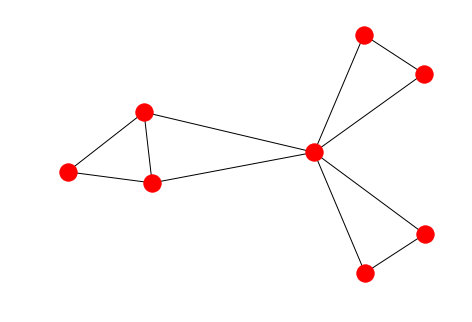

In [10]:
import matplotlib.pyplot as plt
def answer_three(G):
    
    ## Get the set of employees
    employees = set([n[0] for n in G.nodes(data = 'type') if n[1]['type'] == 'employee'])
    
    ## Get the weighted projected graph using bipartite algos
    P = bipartite.weighted_projected_graph(G, employees)
    
    return P

P = answer_three(G)

## Attempt to draw the bipartite graph
nx.draw(P)
plt.draw()
plt.show()

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [11]:
!cat Employee_Relationships.txt

Andy	Claude	0
Andy	Frida	20
Andy	Georgia	-10
Andy	Joan	30
Andy	Lee	-10
Andy	Pablo	-10
Andy	Vincent	20
Claude	Frida	0
Claude	Georgia	90
Claude	Joan	0
Claude	Lee	0
Claude	Pablo	10
Claude	Vincent	0
Frida	Georgia	0
Frida	Joan	0
Frida	Lee	0
Frida	Pablo	50
Frida	Vincent	60
Georgia	Joan	0
Georgia	Lee	10
Georgia	Pablo	0
Georgia	Vincent	0
Joan	Lee	70
Joan	Pablo	0
Joan	Vincent	10
Lee	Pablo	0
Lee	Vincent	0
Pablo	Vincent	-20


In [27]:
relation_df =  pd.read_csv('Employee_Relationships.txt', delimiter='\t', header=None,
                           names = ['Employee_1', 'Employee_2', 'score'])

def bipartite_to_df(P):
    employee_1_list = []
    employee_2_list = []
    movies_in_common_list = []
    for i in P.adjacency_iter():
        for emp_2 in i[1].keys():
            employee_1_list.append(i[0])
            employee_2_list.append(emp_2)
            movies_in_common_list.append(i[1][emp_2]['weight'])
    shared_movies_df = pd.DataFrame({'Employee_1': employee_1_list,
                                     'Employee_2': employee_2_list,
                                     'movies_in_common': movies_in_common_list})
    return shared_movies_df


shared_movies_df = bipartite_to_df(P)


def answer_four(df1 = relation_df, df2 = shared_movies_df):
    
    corr_df = df1.merge(df2, how = 'left')
    corr_df['movies_in_common'] = corr_df['movies_in_common'].fillna(0)
    
    return corr_df.corr().loc['score', 'movies_in_common']

corr = answer_four()
corr

0.78839622217334759